In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')

In [2]:
df = df.sample(10000, random_state=2)
print(df.shape)

(10000, 6)


In [3]:
import re
from bs4 import BeautifulSoup
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q


In [4]:
preprocess("Hello bro! whats up in $")

'hello bro  whats up in dollar'

In [5]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

C:\python37\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [7]:
## Feature engineering
df['qsn1_len'] = df['question1'].str.len()
df['qsn2_len'] = df['question2'].str.len()

In [8]:
df['qsn1_word_len'] = df['question1'].str.split().str.len()
df['qsn2_word_len'] = df['question2'].str.split().str.len()

In [9]:
def common_word(row):
    q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
    q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
    return len(q1 & q2)

In [10]:
set(map(lambda word: word.lower().strip(), 'hello iam sunil giri working on NLP project'.split(' ')))

{'giri', 'hello', 'iam', 'nlp', 'on', 'project', 'sunil', 'working'}

In [11]:
df['common_word'] = df.apply(common_word, axis=1)

In [12]:
def total_word(row):
    q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
    q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
    return (len(q1) + len(q2))

In [13]:
df['total_word'] = df.apply(total_word, axis=1)

In [14]:
df['word_share'] = round(df['common_word']/df['total_word'],2)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,8,24,0.33


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Advanced features
from nltk.corpus import stopwords 
from spacy.lang.en.stop_words import STOP_WORDS
def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    token_features = [0.0]*8
    
    #converting the sentence into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens)==0:
        return token_features
    
    # Get the non-stopwords in question
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    # Get the stopword in questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords form question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopword from questions
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common token form question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # first word of both questions is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [17]:
token_features = df.apply(fetch_token_features, axis=1)

df['cwc_min'] = list(map(lambda x:x[0], token_features))
df['cwc_max'] = list(map(lambda x:x[1], token_features))
df['csc_min'] = list(map(lambda x:x[2], token_features))
df['csc_max'] = list(map(lambda x:x[3], token_features))
df['ctc_min'] = list(map(lambda x:x[4], token_features))
df['ctc_max'] = list(map(lambda x:x[5], token_features))
df['last_word_eq'] = list(map(lambda x:x[6], token_features))
df['first_word_eq'] = list(map(lambda x:x[7], token_features))

In [18]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,...,total_word,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,24,0.33,0.666644,0.666644,0.714276,0.555549,0.583328,0.466664,1,1
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,38,0.11,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,34,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,0.23,0.749981,0.749981,0.000000,0.000000,0.599988,0.333330,1,0


In [19]:
import distance
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    length_features = [0.0]*8
    
    #converting the sentence into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens)==0:
        return length_features
    
    # Absolute length feature
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average length feature
    length_features[1] = (len(q1_tokens) + len(q2_tokens))
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [20]:
length_features = df.apply(fetch_length_features, axis=1)

In [21]:
df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_subs_ratio'] = list(map(lambda x: x[2], length_features))

In [22]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_subs_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.874989,0.999980,0.999980,0.923070,0.923070,1,1,0,26,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,0.666644,0.714276,0.555549,0.583328,0.466664,1,1,3,27,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,0.000000,0.428565,0.272725,0.149999,0.115384,0,0,6,46,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,17,43,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.749981,0.000000,0.000000,0.599988,0.333330,1,0,4,14,0.542857


In [23]:
# Fuzzy features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    #fuzzy ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)
    
    # fuzzy_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    
    # TOken_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
    
    #token set ratio
    fuzzy_features[3] = fuzz.token_sort_ratio(q1, q2)
    
    return fuzzy_features

In [24]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [25]:
print(df.shape)
df.head()

(10000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_subs_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1,1,0,26,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,0.466664,1,1,3,27,0.224490,69,67,65,65
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,0.115384,0,0,6,46,0.047619,26,29,34,34
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,0.000000,0,0,17,43,0.050847,29,41,23,23
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1,0,4,14,0.542857,55,70,48,48


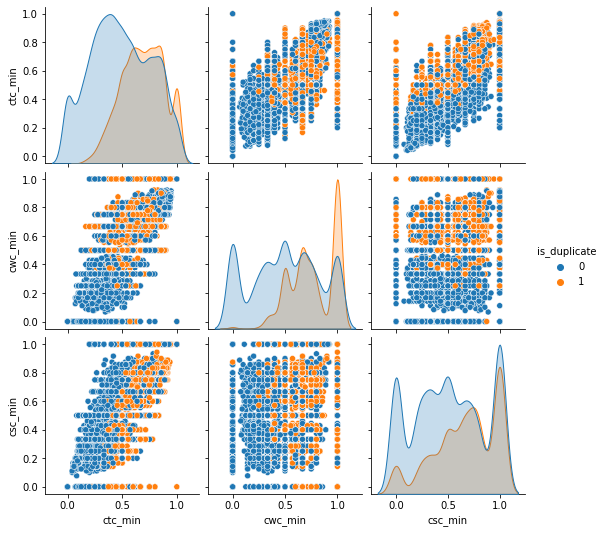

In [26]:
import seaborn as sns
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue='is_duplicate')

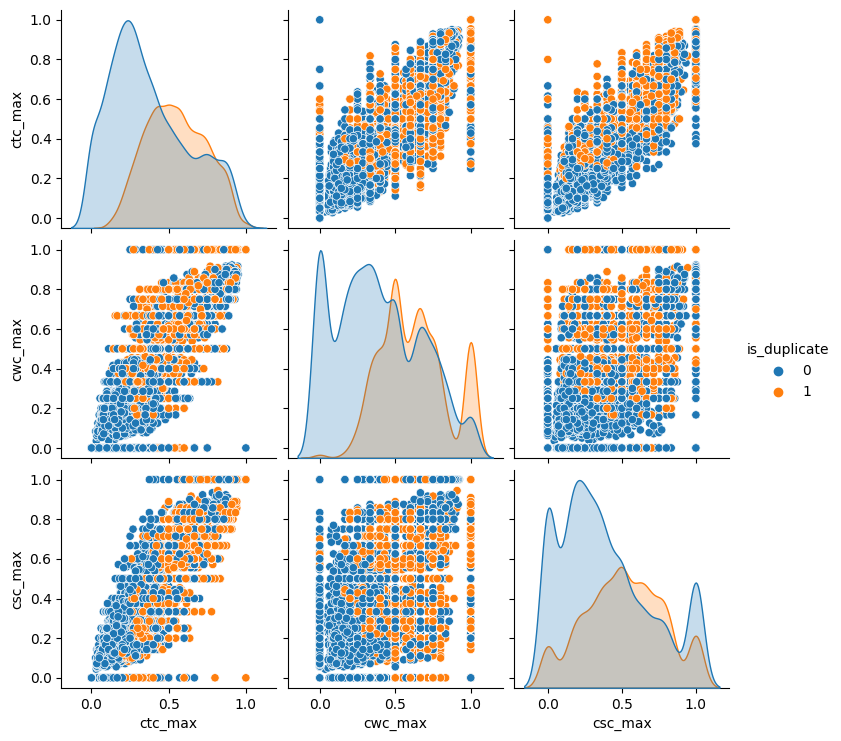

In [27]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue='is_duplicate')

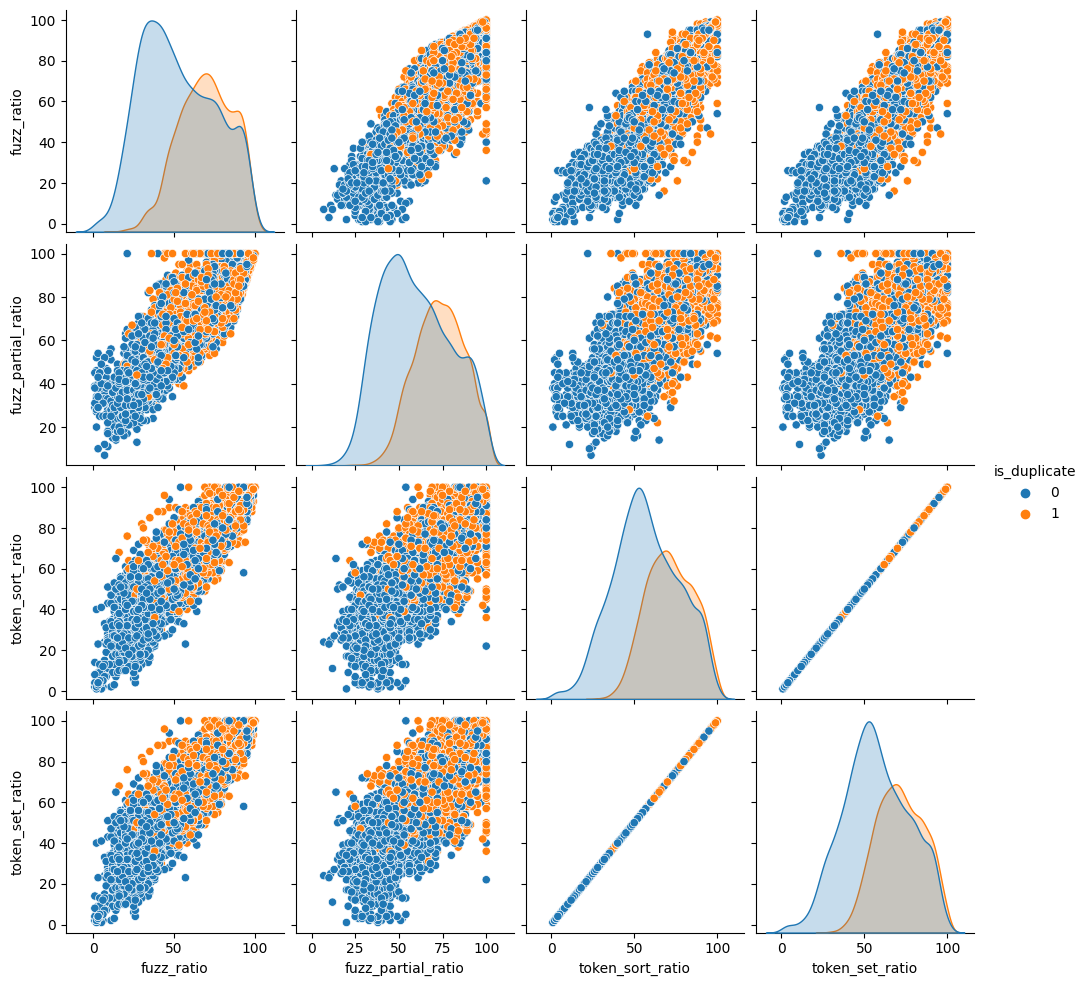

In [28]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']], hue='is_duplicate')

In [29]:
# using TSNE for dimensionality reduction for 15 features to 3 dimension
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['ctc_min','ctc_max', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max','last_word_eq', 'first_word_eq', 'abs_len_diff' ,'mean_len', 'longest_subs_ratio', 'fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio']])
y = df['is_duplicate'].values

In [30]:
# from sklearn.manifold import TSNE

# tsne2d = TSNE(n_components=2, init='random',
#              random_state=101, method='barnes_hut',
#              n_iter=1000,
#              verbose=2,
#              angle=0.5).fit_transform(X)

In [31]:
temp_df = df[['question1', 'question2']]
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_subs_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1,1,0,26,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,12,15,...,0.466664,1,1,3,27,0.224490,69,67,65,65
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,26,20,...,0.115384,0,0,6,46,0.047619,26,29,34,34
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,13,30,...,0.000000,0,0,17,43,0.050847,29,41,23,23
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1,0,4,14,0.542857,55,70,48,48


In [32]:
new_df = df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(new_df.shape)
new_df.head()

(10000, 23)


,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_subs_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.923070,1,1,0,26,0.855263,99,99,99,99
115086,0,48,56,12,15,8,24,0.33,0.666644,0.666644,...,0.466664,1,1,3,27,0.224490,69,67,65,65
327711,0,104,119,26,20,4,38,0.11,0.000000,0.000000,...,0.115384,0,0,6,46,0.047619,26,29,34,34
367788,0,58,145,13,30,1,34,0.03,0.000000,0.000000,...,0.000000,0,0,17,43,0.050847,29,41,23,23
151235,0,34,49,5,9,3,13,0.23,0.749981,0.749981,...,0.333330,1,0,4,14,0.542857,55,70,48,48


In [33]:
import spacy
# nlp = spacy.load("C:/Python311/Lib/site-packages/en_core_web_lg/en_core_web_lg-3.5.0")

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
question = list(temp_df['question1']) + list(temp_df['question2'])
cv = CountVectorizer(max_features=2000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [35]:
temp_df1 = pd.DataFrame(q1_arr,index=temp_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=temp_df.index)
temp_new = pd.concat([temp_df1, temp_df2], axis=1)
temp_new.shape

(10000, 4000)

In [36]:
final_df = pd.concat([new_df, temp_new], axis=1)
print(final_df.shape)
final_df.head()

(10000, 4023)


,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share,cwc_min,cwc_max,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,48,56,12,15,8,24,0.33,0.666644,0.666644,...,0,0,0,0,0,0,0,0,0,0
327711,0,104,119,26,20,4,38,0.11,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,58,145,13,30,1,34,0.03,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
151235,0,34,49,5,9,3,13,0.23,0.749981,0.749981,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# final_df.drop(['question1', 'question2'],axis=1, inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=24)
print(X_train.shape)
print(X_test.shape)

(8000, 4022)
(2000, 4022)


In [39]:
# ## We need to change my X_train and X_test to 2d
# X_train_2d = np.stack(X_train)
# X_test_2d = np.stack(X_test)
# X_train_2d

In [40]:
# print(X_train_2d.shape)
# print(X_test_2d.shape)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7645


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7035


In [43]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred1 = xg.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.7595


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pre = knn.predict(X_test)

In [45]:
print(accuracy_score(y_test, y_pred))

0.7035


In [46]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.models import Model, Sequential
from keras.layers import Reshape


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.keras.callbacks import EarlyStopping

# define the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4022,)))
model.add(Dropout(0.2))
model.add(Reshape((1, 64)))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])

# evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/50
250/250 [==============================] - 12s 16ms/step - loss: 0.5968 - accuracy: 0.6440 - val_loss: 0.5776 - val_accuracy: 0.6705
Epoch 2/50
250/250 [==============================] - 3s 11ms/step - loss: 0.5596 - accuracy: 0.6691 - val_loss: 0.5352 - val_accuracy: 0.6980
Epoch 3/50
250/250 [==============================] - 3s 12ms/step - loss: 0.5205 - accuracy: 0.7085 - val_loss: 0.4934 - val_accuracy: 0.7345
Epoch 4/50
250/250 [==============================] - 3s 11ms/step - loss: 0.4764 - accuracy: 0.7496 - val_loss: 0.4805 - val_accuracy: 0.7450
Epoch 5/50
250/250 [==============================] - 3s 11ms/step - loss: 0.4436 - accuracy: 0.7739 - val_loss: 0.5024 - val_accuracy: 0.7225
Epoch 6/50
250/250 [==============================] - 3s 10ms/step - loss: 0.4208 - accuracy: 0.7906 - val_loss: 0.4989 - val_accuracy: 0.7390
Epoch 7/50
250/250 [==============================] - 3s 11ms/step - loss: 0.4005 - accuracy: 0.8090 - val_loss: 0.5580 - val_accuracy: 0.714

In [48]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [49]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [50]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [51]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [52]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [53]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [54]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of India?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [55]:
rf.predict(query_point_creator(q1,q2))

array([1], dtype=int64)

In [56]:
cv

CountVectorizer(max_features=2000)

In [58]:
import pickle
with open('model_new.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('cv_1.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [ ]:
# import pickle

# pickle.dump(rf,open('model.pkl','wb'))
# pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
# pickle.dump(fetch_token_features,open('stopwords.pkl','wb'))

In [59]:
with open('query_point_creator.pkl', 'wb') as f:
    pickle.dump(query_point_creator, f)